# Demo of Ch3. Non-Linear Classifier
----
This is the sample code of TU-ETP-AD1062 Machine Learning Fundamentals.

For more information, please refer to:
https://sites.google.com/view/tu-ad1062-mlfundamentals/

## Import packages
----
- `sklearn`: Scikit-Learn, provides basic data analysis and machine learning methods functionality
    - `neural_network`: For constructing multi-layer perceptron (i.e., Fully connected layer in deep learning) classifier
    - `svm`: For constructing Support Vector Machine (SVM) classifier
    - `tree`: For constructing basic decision tree classifier
- `mlfund`:
    - `dataset`: Used to generate data in a normal distribution, with `Gaussian` instances as a handler to generate data which distribution can be described by `GaussianParam` instance
- `lightgbm`: LightGBM library, for constructing gradient boosting classifier
- `graphviz`: Plot the decision tree and boosting tree
    


In [1]:
import numpy as np
import sklearn.metrics
import sklearn.neural_network
import sklearn.svm
import sklearn.tree
import sklearn.datasets

import lightgbm as lgb

from mlfund.dataset import Gaussian, GaussianParam
from mlfund.plot import Plot2D, Plot3D

import graphviz

%matplotlib inline

## Data Generation

### Normal distributed data
----
The demo here generate two groups of 2-dimension data which are normally distributed as follows:
1. Generate 800 training data `X_train`, with corresponded label `y_train`
2. Generate 800 testing data `X_test`, with corresponded label `y_test`

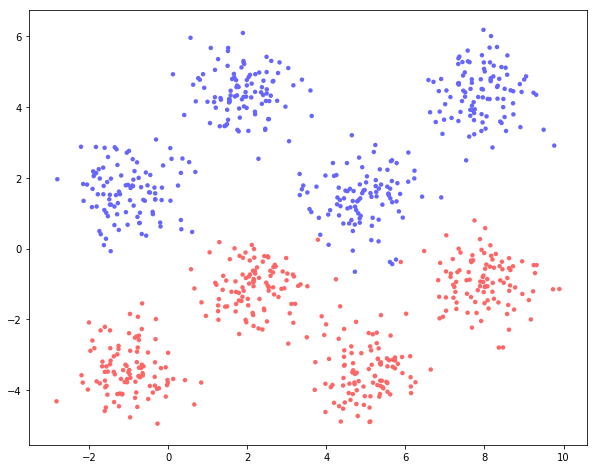

In [2]:
# Generate Training data and plot it
np.random.seed(0)

params_train = []

param = GaussianParam()
param.mean = [-1, 1.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [2, 4.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [5, 1.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [8, 4.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)


param = GaussianParam()
param.mean = [-1, -3.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [2, -1]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [5, -3.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [8, -1]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)


X_train, y_train = Gaussian.generate(params_train)
y_train[0:400] = 1
y_train[400:800] = 2

plot = Plot2D()
plot.scatter(X_train, y_train)
plot.show()


# Generate testing data
X_test, y_test = Gaussian.generate(params_train)
y_test[0:400] = 1
y_test[400:800] = 2

### UC Irvine IRIS dataset
----
The UC Irvine IRIS dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

For more information, see: http://archive.ics.uci.edu/ml/datasets/iris

D:\Github\tu-etp-ad1062\mlfund\plot.py:66: UserWarning: Dimension of samples exceeds 3, only plot the first-3 dimension
  warnings.warn("Dimension of samples exceeds 3, only plot the first-3 dimension")


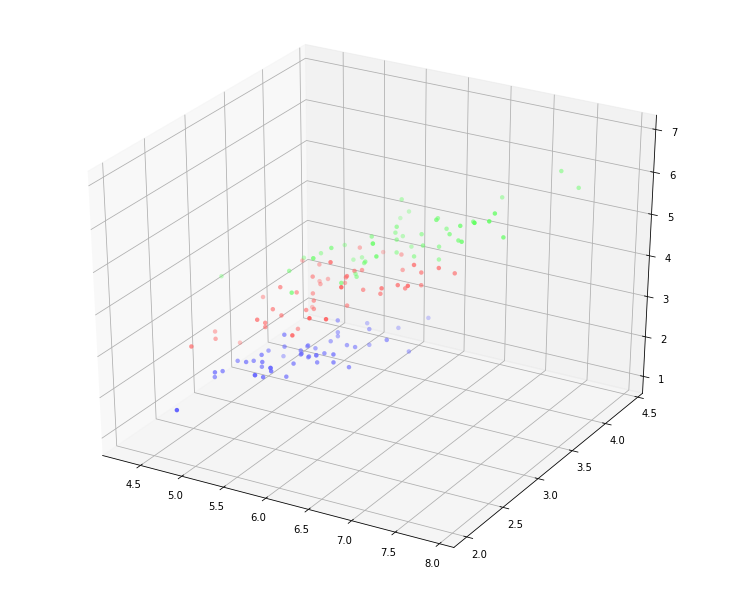

In [3]:
iris = sklearn.datasets.load_iris()

plot = Plot3D()
plot.scatter(iris.data, iris.target)
plot.show()

## 3.1. Multi-Layer Perceptron

### Demo 3.1.1 Multi-Layer Perceptron (MLP)
----
The demo here trains the model by Multi-Layer Perceptron algorithm with `X_train`, then predict the testing data by `X_test`

Training data:


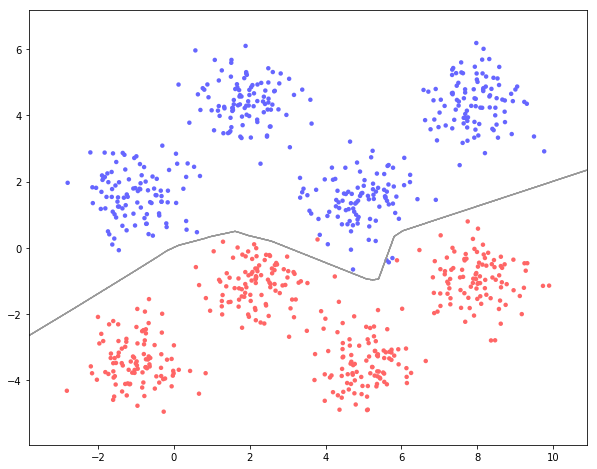

Testing data:
MCE = 0.006


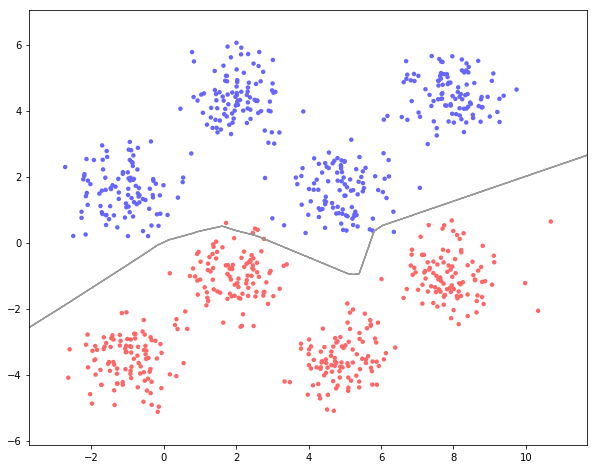

In [4]:
clfMLP = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=(10,10,4),
    max_iter=1000,
    tol=1e-10
)
clfMLP.fit(X_train, y_train)

y_test_predict = clfMLP.predict(X_test)

print("Training data:")
plot = Plot2D()
plot.scatter(X_train, y_train)
plot.classifierContour(X_train, y_train, clfMLP)
plot.show()

print("Testing data:")
print("MCE = %2.3f" % sklearn.metrics.zero_one_loss(y_test, y_test_predict))
plot = Plot2D()
plot.scatter(X_test, y_test)
plot.classifierContour(X_test, y_test, clfMLP)
plot.show()

## 3.2. Non-Linear SVM

### Demo 3.2.1 Non-Linear Support Vector Machine
----
The demo here trains the model by SVM with `X_train`, then predict the testing data by `X_test`
Notice that:
1. The number of support vectors is output via the attribute of `clfSVC.support_vectors_`
2. The support vectors are drawn via the wrapped function `mlfund.scatterSV`

c:\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training data:
#SV = 67


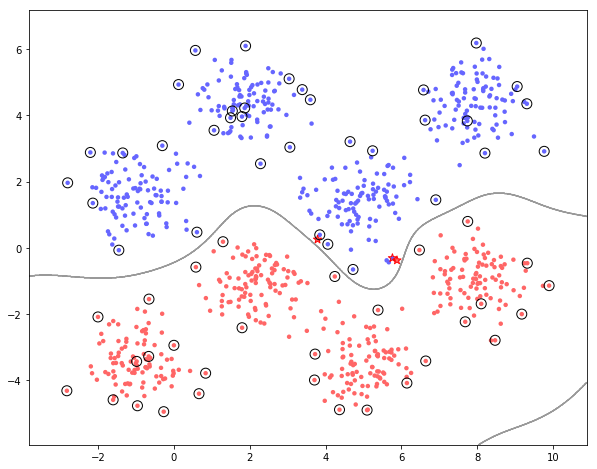

Testing data:
MCE = 0.002


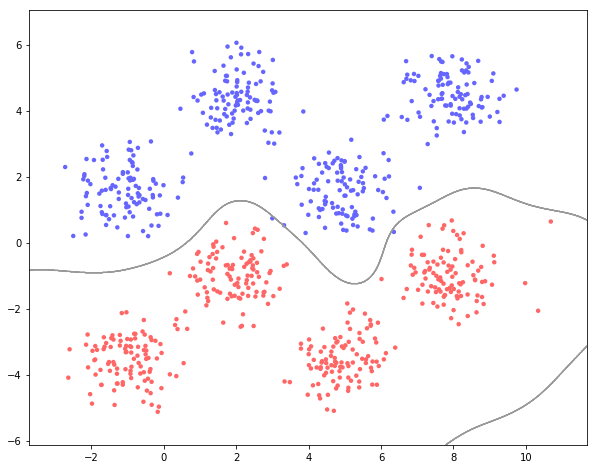

In [5]:
clfSVC = sklearn.svm.SVC(C=10, kernel='rbf')
clfSVC.fit(X_train, y_train)

y_test_predict = clfSVC.predict(X_test)

print("Training data:")
print("#SV = %d" % len(clfSVC.support_vectors_))
plot = Plot2D()
plot.scatter(X_train, y_train)
plot.scatterCSVC(clfSVC)
plot.classifierContour(X_train, y_train, clfSVC)
plot.show()

print("Testing data:")
print("MCE = %2.3f" % sklearn.metrics.zero_one_loss(y_test, y_test_predict))
plot = Plot2D()
plot.scatter(X_test, y_test)
plot.classifierContour(X_test, y_test, clfSVC)
plot.show()

## 3.3. Decision Tree

### Demo 3.3.1 Basic Decision Tree Classifier - IRIS Dataset
----
The demo here use the synthesis normal distribution dataset to demonstrate the construction of decision tree

Reference: http://scikit-learn.org/stable/modules/tree.html#classification

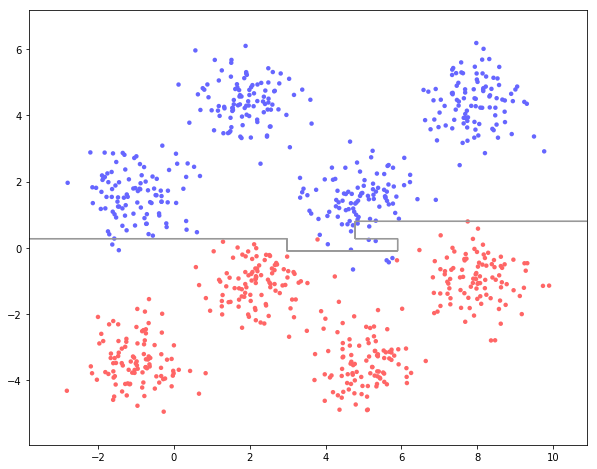

In [6]:
clfDT = sklearn.tree.DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=5
)
clfDT = clfDT.fit(X_train, y_train)

plot = Plot2D()
plot.scatter(X_train, y_train)
plot.classifierContour(X_train, y_train, clfDT)
plot.show()

### Demo 3.3.2 Basic Decision Tree Classifier - IRIS Dataset
----
The demo here use the IRIS dataset to demonstrate the construction of decision tree

Reference: http://scikit-learn.org/stable/modules/tree.html#classification

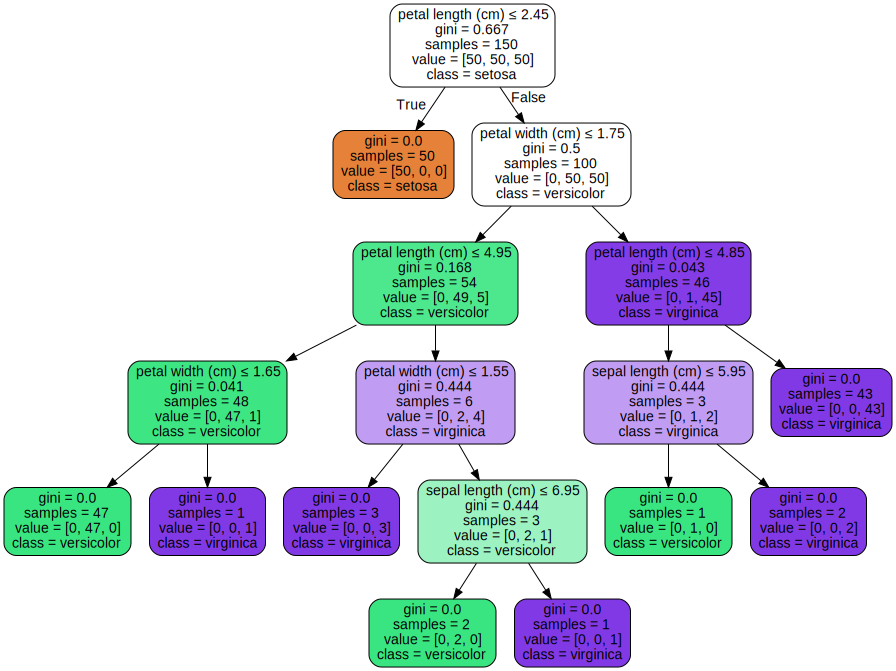

In [7]:
clfDT = sklearn.tree.DecisionTreeClassifier()
clfDT = clfDT.fit(iris.data, iris.target)

dot_data = sklearn.tree.export_graphviz(
    clfDT,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data)
graph

### Demo 3.3.3 Gradient Boosting - Use Use Light GBM as example
----
The demo here use the IRIS dataset to demonstrate the construction of Gradient Boosting Classifier

For more information, see https://lightgbm.readthedocs.io/en/latest/

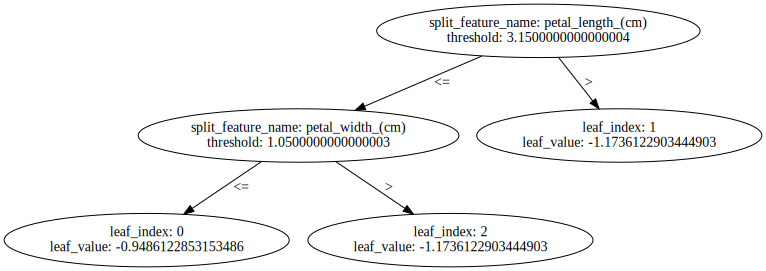

In [8]:
clfLgb = lgb.LGBMClassifier(min_child_samples=1)
clfLgb.fit(
    X=iris.data,
    y=iris.target,
    feature_name=iris.feature_names
)

lgb.create_tree_digraph(clfLgb)

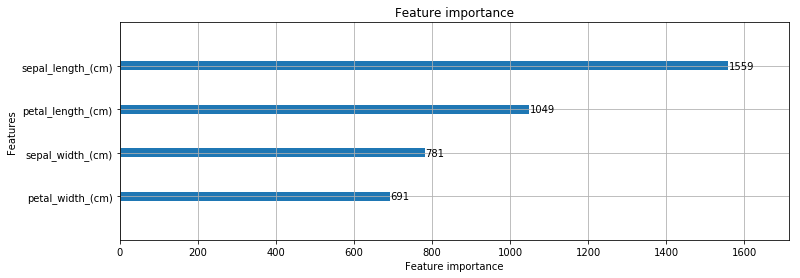

In [9]:
lgb.plot_importance(clfLgb, importance_type='split', max_num_features=20, figsize=(12,4))